# Candlestick Chart using Python

In [12]:
pip install yfinance --upgrade --no-cache-dir 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade mplfinance

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/75.0 kB 54.5 kB/s eta 0:00:02
   --------------------------- ------------ 51.2/75.0 kB 201.8 kB/s eta 0:00:01
   --------------------------- ------------ 51.2/75.0 kB 201.8 kB/s eta 0:00:01
   -------------------------------------- - 71.7/75.0 kB 206.9 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 180.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

Enter the Stock Name :  AAPL


[*********************100%***********************]  1 of 1 completed


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


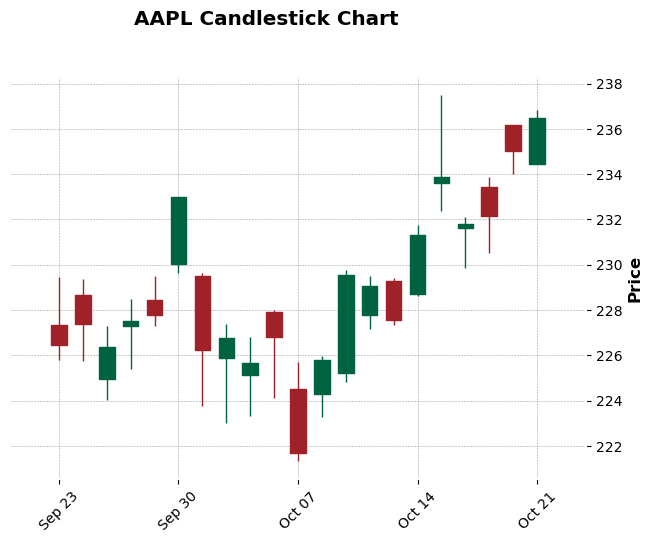

In [30]:
stock = input("Enter the Stock Name : ")              # You want to give stock symbol like Tesla - TSLA, Apple - AAPL
df = yf.download(stock, start='2024-09-22', end='2024-10-22')

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

print(df.columns)

if all(col in df.columns for col in ['Open', 'High', 'Low', 'Close', 'Volume']):
    df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

    df.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

    # Plot the candlestick chart
    mpf.plot(df, type='candle', style='charles', title=f'{stock} Candlestick Chart', ylabel='Price')
else:
    print("One or more required columns are missing.")